In [1]:
import pandas as pd
df = pd.read_csv("./Bengaluru_House_Data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [2]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [4]:
df.shape

(13320, 9)

In [5]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [9]:
df.nunique()

area_type          4
availability      74
location         634
size              15
society         2592
total_sqft      1682
bath               8
balcony            4
price           1518
dtype: int64

In [10]:
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 RK', '4 BHK',
       '1 BHK', '5 BHK', '11 BHK', '5 Bedroom', '9 BHK', '2 Bedroom',
       '6 BHK', '7 BHK', '6 Bedroom'], dtype=object)

In [11]:
df['bhk'] = df['size'].str.extract('(\d+)').astype(float).astype('Int64')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\KULDIP\AppData\Local\Temp\ipykernel_19344\2209943321.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['bhk'] = df['size'].str.extract('(\d+)').astype(float).astype('Int64')


In [12]:
def convert_sqft_to_num(x):
	try:
		if '-' in x:
			vals = x.split('-')
			return int((float(vals[0]) + float(vals[1])) / 2)
		return int(float(x))
	except:
		return None

df["total_sqft"] = df["total_sqft"].apply(convert_sqft_to_num)

# EDA

In [13]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00,2
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785.0,5.0,3.0,295.00,4
...,...,...,...,...,...,...,...,...,...,...
13308,Built-up Area,Ready To Move,Bannerghatta Road,3 BHK,Baanise,1527.0,3.0,1.0,142.00,3
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715.0,3.0,3.0,112.00,3
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00,5
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,2.0,1.0,60.00,2


Text(0.5, 1.0, 'area wise maximum price')

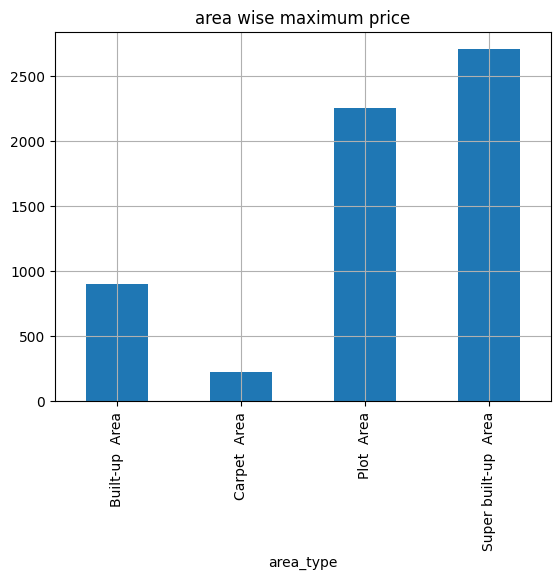

In [14]:
# area wise max price
import matplotlib.pyplot as plt
df.groupby("area_type")["price"].max().plot(kind="bar")
plt.grid()
plt.title("area wise maximum price")

<Axes: xlabel='bhk'>

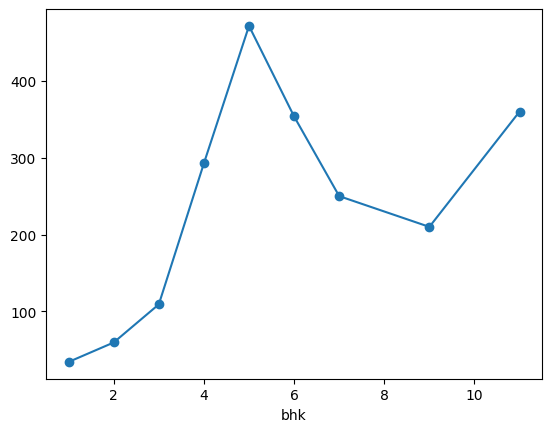

In [15]:
# bhk vs price relation

df.groupby("bhk")["price"].mean().plot(kind="line", marker="o")

# model 

In [16]:
df.pop("size")


0            2 BHK
1        4 Bedroom
3            3 BHK
5            2 BHK
11       4 Bedroom
           ...    
13308        3 BHK
13314        3 BHK
13315    5 Bedroom
13317        2 BHK
13318        4 BHK
Name: size, Length: 7144, dtype: object

In [17]:
df

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600.0,5.0,3.0,120.00,4
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,3
5,Super built-up Area,Ready To Move,Whitefield,DuenaTa,1170.0,2.0,1.0,38.00,2
11,Plot Area,Ready To Move,Whitefield,Prrry M,2785.0,5.0,3.0,295.00,4
...,...,...,...,...,...,...,...,...,...
13308,Built-up Area,Ready To Move,Bannerghatta Road,Baanise,1527.0,3.0,1.0,142.00,3
13314,Super built-up Area,Ready To Move,Green Glen Layout,SoosePr,1715.0,3.0,3.0,112.00,3
13315,Built-up Area,Ready To Move,Whitefield,ArsiaEx,3453.0,4.0,0.0,231.00,5
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,Mahla T,1141.0,2.0,1.0,60.00,2


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7144 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     7144 non-null   object 
 1   availability  7144 non-null   object 
 2   location      7144 non-null   object 
 3   society       7144 non-null   object 
 4   total_sqft    7129 non-null   float64
 5   bath          7144 non-null   float64
 6   balcony       7144 non-null   float64
 7   price         7144 non-null   float64
 8   bhk           7144 non-null   Int64  
dtypes: Int64(1), float64(4), object(4)
memory usage: 565.1+ KB


In [19]:
df.dropna(inplace=True)
df.to_csv("Housing.csv",index=False)

In [20]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load cleaned dataset
  # Make sure this file is already cleaned

# Use relevant features
X = df[['total_sqft', 'bath', 'bhk', 'balcony']]
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict and calculate R²
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Print model accuracy
print(f"R² Score (Model Accuracy): {r2*100:.3f}")


R² Score (Model Accuracy): 63.512
